In [2]:
import pandas as pd

# Import matplotlib (https://en.wikipedia.org/wiki/Matplotlib)
import matplotlib

# Import the pyplot "submodule" for fast plotting
# (https://www.quora.com/What-is-the-difference-between-Python-modules-packages-libraries-and-frameworks)
import matplotlib.pyplot as plt

# Graphics should appear "inline" (within the Jupyter Notebook instead of somewhere else)
%matplotlib inline

# Indicate the template to use for the plot (not required)
# Type plt.style.available to experiment with different styles
plt.style.use('seaborn-bright')

import seaborn as sns

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# Fast review

1. What are some key components of text preprocessing? 
2. Why is text preprocessing important?

In [4]:
%pwd # print working directory

'/Users/brooks/Projects/D-Lab/DIGHUM101-2021/Notebooks/Week2'

In [5]:
# Sometimes there is no need to set the working directory! 
# What is going on in the file path in pd.read_csv()?

lit = pd.read_csv("../../Data/childrens_lit.csv", sep = "\t")

print(lit.shape)
lit.head(8)

(133, 5)


,Unnamed: 0,title,author gender,year,text
0,0,A Dog with a Bad Name,Male,1886,A DOG WITH A BAD NAME BY TALBOT BAINES REED ...
1,1,A Final Reckoning,Male,1887,A Final Reckoning: A Tale of Bush Life in Aust...
2,2,"A House Party, Don Gesualdo, and A Rainy June",Female,1887,A HOUSE-PARTY Don Gesualdo and A Rainy June...
3,3,A Houseful of Girls,Female,1889,"A HOUSEFUL OF GIRLS. BY SARAH TYTLER, AUTHOR ..."
4,4,A Little Country Girl,Female,1885,"LITTLE COUNTRY GIRL. BY SUSAN COOLIDGE, ..."
5,5,A Round Dozen,Female,1883,\n A ROUND DOZEN. [Illustration: TOINETTE AND...
6,6,A Sailor's Lass,Female,1886,"A SAILOR'S LASS by EMMA LESLIE, Author of ""..."
7,7,A World of Girls,Female,1886,A WORLD OF GIRLS: THE STORY OF A SCHOOL. By ...


In [6]:
# How to get the text of a book from a single cell?

lit["text"][0][:100]

# Or... remember iloc?
# lit.iloc[0]["text"]

'A DOG WITH A BAD NAME  BY TALBOT BAINES REED    CHAPTER ONE.  DRY-ROT.  Bolsover College was in a ba'

# Learning objectives

1. Learn some theory and best practices of data visualization.
2. Make a matplotlib histogram, barplot, boxplot, and scatterplot.
3. Begin to read Claus O. Wilke's [Fundamentals of Data Visualization](https://serialmentor.com/dataviz/)

# Theory of Data Visualization

Visualization is meant to convey information.

> The power of a graph is its ability to enable one to take in the quantitative information, organize it, and see patterns and structure not readily revealed by other means of studying the data.

\- Cleveland and McGill, 1984

Certain techniques make that information easier to interpret and understand. In their 1984 paper titled, "[Graphical Perception: Theory, Experimentation, and Application to the Development of Graphical Methods](https://www-jstor-org.libproxy.berkeley.edu/stable/2288400?seq=1#page_scan_tab_contents)," Cleveland and McGill identify 10 elementary perceptual tasks that are used to "extract quantitative information from graphs." Their premise is:

> A graphical form that involves elementary perceptual tasks that lead to more accurate judgments than another graphical form (with the same quantitative information) will result in better organization and increase the chances of a correct perception of patterns and behavior.

Whereas graph design had, up to that point, been "largely unscientific," Cleveland and McGill took a systematic approach in analyzing human graphical perception through experimentation. Their researched helped identify the most and least accurate elementary perceptual tasks, ordered below:

1. Position along a common scale
2. Position along non-aligned scales
3. Length, direction, angle
4. Area
5. Volume, curvature
6. Shading, color saturation

In 2010, [Heer and Bostock](http://vis.stanford.edu/files/2010-MTurk-CHI.pdf) confirmed these results using Amazon's Mechanical Turk.

Let's take a look at a few examples. Because we're only interested in relative sizes, we don't include a legend with size information or reference points.

![circles](../../Img/circles.png)

For circles of distinctly different sizes, the comparison is simple. For example, "A" is smaller than "B." However, for circles, such as "L" and "M," that are almost the same size, it's difficult to tell which is smaller. Area, according to Cleveland and McGill's research, is less accurate than, say, length, which we consider next.

![circles](../../Img/bars.png)

Focusing on "L" and "M," it is clear to see which is larger. You might be wondering whether scale makes a difference&mdash;that is, if the small circle sizes make it difficult to compare&mdash;it doesn't.

Next, we consider a case where we want to plot two series. For this example, let's suppose we're working with student English and Math test scores. Here, we'll want to use bars, which we arbitrarily label Z-L. The question is, which bars should we use? This is a case where the answer depends on what we're trying to communicate. If we're interested in showing total scores, we could use a stacked bar chart.

![circles](../../Img/two-series-0.png)

We can tell that "Y" and "L" had the highest cumulative scores. What if we want to know which students scored highest on the math exam? Because the math portions of each bar are on "non-aligned scales," as Cleveland and McGill call it, it's difficult to tell. One solution is to plot these on opposite sides of the x-axis.

![circles](../../Img/two-series-1.png)

Now, it's easier to see that "R" scored quite well on the math exam. The tradeoff with this layout is that it's difficult to compare cumulative scores. Comparing "Z" and "O," for example, is a challenge. Again, it depends on what the message is.

These findings are a *guide* for what works when the goal is to make accurate judgments. Sometimes, however, the goal might not be to allow for precise comparisons but, rather, to facilitate the perception of larger patterns. This is usually the case with choropleth maps.

### Form and Function

> A good graphic realizes two basic goals: It **presents** information, and it allows users to **explore** that information.

\- Alberto Cairo

> A data visualization should only be beautiful when beauty can promote understanding in some way without undermining it in another. Is beauty sometimes useful? Certainly. Is beauty always useful? Certainly not.

\- Stephen Few

> Good displays of data help to reveal knowledge relevant to understanding mechanism, process and dynamics, cause and effect.

\- Edward Tufte

A figure is ineffective if it "wastes too much real estate (and the designer's time) on things that don't help readers understand [it]." - Alberto Cairo

> The important criterion for a graph is not simply how fast we can see a result; rather it is whether through the use of the graph we can see something that would have been harder to see otherwise or that could not have been seen at all.

\- William Cleveland

> [A]lways take advantage of the space you have available to seek depth within reasonable limits. After that, *and only after that*, worry about how to make the presentation prettier.

\- Alberto Cairo

Ultimately, identify your audience and their needs and interests. The same data should be visualized differently for a scientific publication versus a magazine.

In [7]:
# Load the gapminder dataset
# Notice we did not set our working directory first - what did we do instead?
gap = pd.read_csv("../../Data/gapminder-FiveYearData.csv")

In [8]:
print(gap.shape)
gap.head()

(1704, 6)


,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [9]:
gap.dtypes

country       object
year           int64
pop          float64
continent     object
lifeExp      float64
gdpPercap    float64
dtype: object

# Histogram

Use a histogram when you would like to visualize the distribution of a single float or integer variable. 

/Users/brooks/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


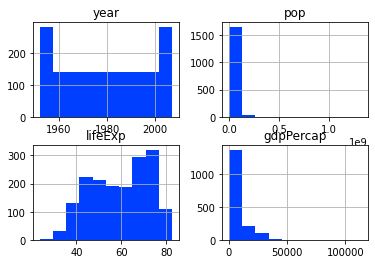

In [10]:
# Neat!!
gap.hist();

### We can also adjust the figure size.

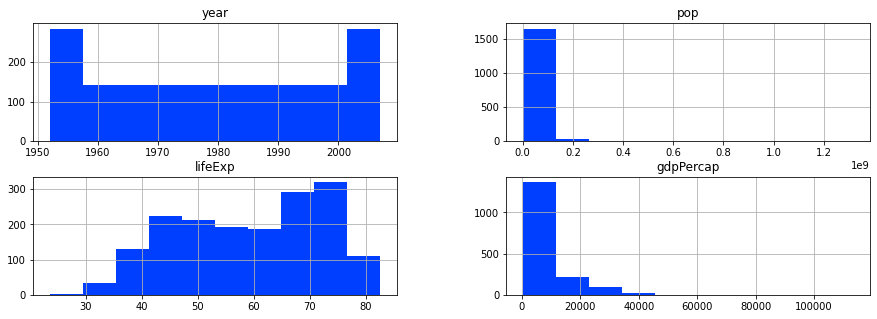

In [11]:
gap.hist(figsize = (15, 5)); # width, height

### Change the number of bins

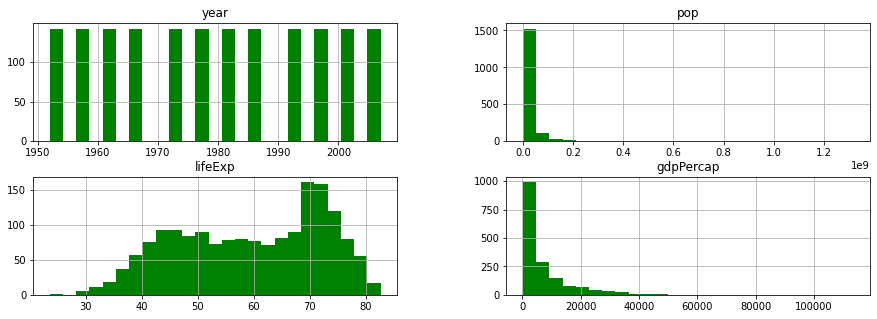

In [12]:
gap.hist(bins = 25, figsize = (15, 5), color = "green");

### Plot a single variable

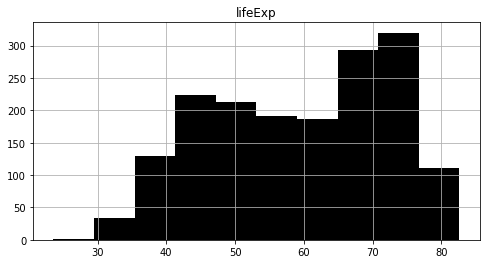

In [13]:
gap.hist(column="lifeExp", figsize = (8, 4), color = "black");

# Bar Plot

You can use a bar plot when you want to illustrate differences in frequencies of some category. Let's look at the 12 most frequent words in "jordan2013.txt"

In [14]:
jordan = open("../../Data/human-rights/jordan2013.txt", 
              encoding = "utf-8").read()
print(jordan[0:500])


Distr.: General 6 January 2014 
Original: English 
General Assembly 
Human Rights Council Twenty-fifth session 
Agenda item 6 
Universal periodic review 

Report of the Working Group on the Universal Periodic Review* 
Jordan 
* The annex to the present report is circulated as received. 

GE.14-10063 
*1410063* 
Contents 
Paragraphs Page 
Introduction............................................................................................................. 1Ð4 3 
I. Summary of the proceedings 


In [15]:
from collections import Counter

In [16]:
# Tokenize jordan.txt into single words
jordan_tokens = jordan.split()
print(jordan_tokens[0:25])

['Distr.:', 'General', '6', 'January', '2014', 'Original:', 'English', 'General', 'Assembly', 'Human', 'Rights', 'Council', 'Twenty-fifth', 'session', 'Agenda', 'item', '6', 'Universal', 'periodic', 'review', 'Report', 'of', 'the', 'Working', 'Group']


In [17]:
# Count the 12 most common words
jordan_freq = Counter(jordan_tokens)
jordan_barplot = jordan_freq.most_common(12)
jordan_barplot

[('the', 901),
 ('of', 630),
 ('and', 550),
 ('to', 436),
 ('in', 221),
 ('It', 148),
 ('on', 124),
 ('for', 109),
 ('with', 99),
 ('rights', 98),
 ('that', 83),
 ('made', 82)]

In [18]:
# Convert to data frame
jordan_df = pd.DataFrame(data = jordan_barplot, 
                         columns = ["Word", "Frequency"])
jordan_df

,Word,Frequency
0,the,901
1,of,630
2,and,550
3,to,436
4,in,221
5,It,148
6,on,124
7,for,109
8,with,99
9,rights,98


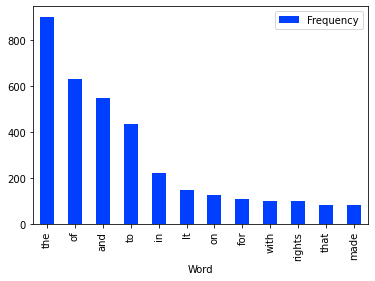

In [19]:
# Plot!
# jordan_df.plot.bar(x = "Word", y = "Frequency", figsize = (6,4));
jordan_df.plot(kind="bar", x = "Word", y = "Frequency", figsize = (6,4));

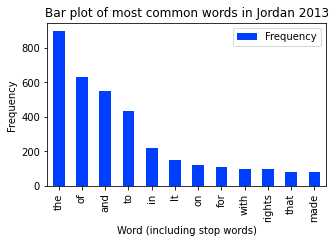

In [20]:
# Change x and y axis labels; add title
jordan_df.plot.bar(x = "Word", y = "Frequency", figsize = (5,3))
plt.xlabel("Word (including stop words)")
plt.ylabel("Frequency")
plt.title("Bar plot of most common words in Jordan 2013");

# Boxplot

Use boxplots when you want to illustrate variation in a single float or integer but by some category. Let's make boxplots of life expectancy **_by_** continent in the gapminder dataset.

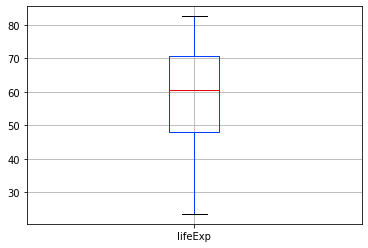

In [21]:
# For the entire dataset...
gap.boxplot(column=["lifeExp"]);

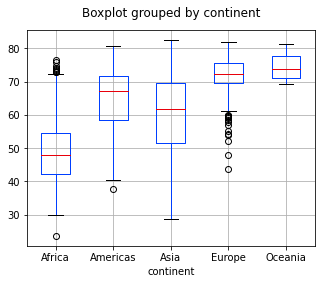

In [22]:
# For each continent
gap.boxplot(column=["lifeExp"], 
            by = "continent", 
            figsize = (5, 4)
           )

plt.title("");

# Scatterplot

Scatterplots are useful to show the relationships between two float/integer variables. Make a scatterplot with life expectancy on the x-axis and population on the y-axis from the gapminder dataset.

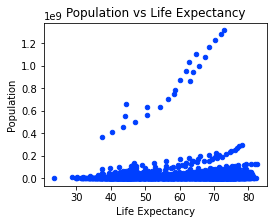

In [32]:
# Note the attribute-style syntax for calling the particular columns!
gap.plot.scatter(x = "lifeExp", 
                 y = "pop", 
                 figsize = (4, 3));
plt.xlabel("Life Expectancy")
plt.ylabel("Population")
plt.title("Population vs Life Expectancy");

# Exporting Figures

You will want to export some figures to include in your presentations and other work. Add the `plt.savefig();` call as your last line of code! Remember this will save to your working directory!

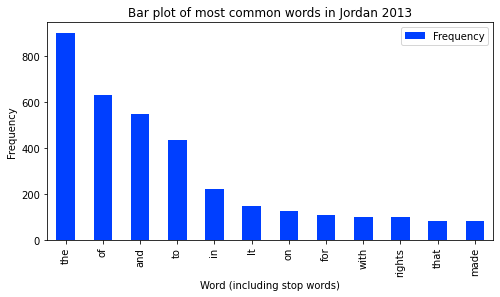

In [30]:
jordan_df.plot.bar(x = "Word", y = "Frequency", figsize = (8,4))
plt.xlabel("Word (including stop words)")
plt.ylabel("Frequency")
plt.title("Bar plot of most common words in Jordan 2013")
plt.savefig("barplot_example.jpg", dpi = 100);

In [28]:
%pwd

'/Users/brooks/Projects/D-Lab/DIGHUM101-2021/Notebooks/Week2'

You will then want to export this .PDF to a .TIFF or similar file depending on submission requirements. 

Mac users open the .PDF file in Preview, click File --> Export --> Select .tiff --> select .jpeg compress

Windows users - try the same thing but use "Save As" instead of "Export"